In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MBA.csv',index_col=0, encoding= "utf-8")
df.head() # check the first 5 entries

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
application_id,,,,,,,,,
1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


In [4]:
# settings
colors = ['#78C850',
      '#F08030',
      '#6890F0',
      '#A8B820',
      '#A8A878',
      '#A040A0',
      '#F8D030',
      '#EE99AC',
      '#C03028',
      '#F85888',
      '#B8A038',
      '#705898',
      '#98D8D8',
      '#7038F8',
      ]
sns.set_style('darkgrid')

In [5]:
# addressing null values in race and admission columns
# null/other -> international
# null -> deny
df['race'].fillna('International',inplace=True)
#df['race'].replace('Other','International',inplace=True)
df['admission'].fillna('Deny',inplace=True)

#df['work_industry']=df['work_industry'].astype('category')

df.head()

<ipython-input-5-6270cbe9fa34>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['race'].fillna('International',inplace=True)
<ipython-input-5-6270cbe9fa34>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
application_id,,,,,,,,,
1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,Deny
3,Female,True,3.30,Business,International,710.0,5.0,Technology,Admit
4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,Deny
5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,Deny


<ipython-input-6-5ebc6d8389c9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='admission',data=df,palette=colors,stat='percent')
<ipython-input-6-5ebc6d8389c9>:3: UserWarning: The palette list has more values (14) than needed (3), which may not be intended.
  sns.countplot(x='admission',data=df,palette=colors,stat='percent')


Text(0.5, 1.0, 'Admission Statistics')

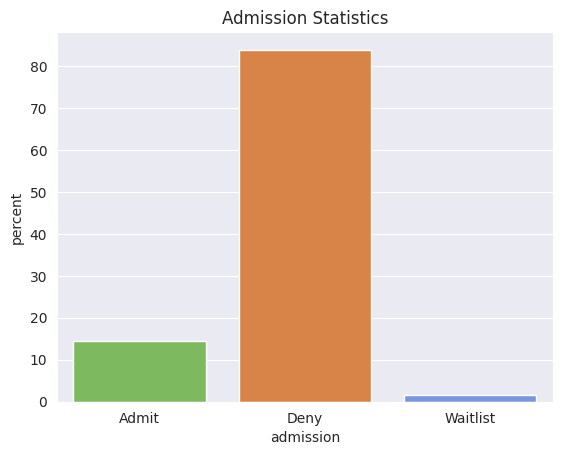

In [6]:
# check the statistics of admission
plt.figure()
sns.countplot(x='admission',data=df,palette=colors,stat='percent')
plt.title('Admission Statistics')

<ipython-input-7-b46dd6d34aeb>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='work_exp',data=df.loc[df['work_industry']=='Nonprofit/Gov'],palette=colors,stat='percent',ax=ax[0,0])
<ipython-input-7-b46dd6d34aeb>:7: UserWarning: The palette list has more values (14) than needed (7), which may not be intended.
  sns.countplot(x='work_exp',data=df.loc[df['work_industry']=='Nonprofit/Gov'],palette=colors,stat='percent',ax=ax[0,0])
<ipython-input-7-b46dd6d34aeb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='work_exp',data=df.loc[df['work_industry']=='Consulting'],palette=colors,stat='percent',ax=ax[0,1])
<ipython-input-7-b46dd6d34aeb>:11: UserWarning: The palette list has more va

Text(0.5, 1.0, 'PE/VC')

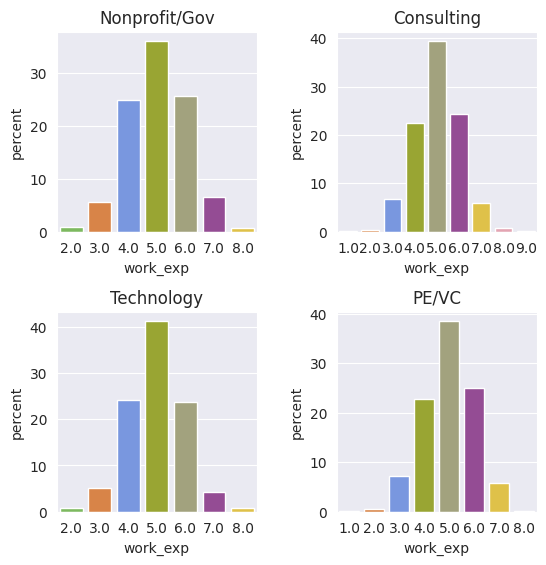

In [7]:
# Question: does the distribution of working experience differ across different industries？

# work_exp distribution for Non-profit/Gov and other jobs
fig,ax = plt.subplots(2,2,figsize = (6,6)) # 3 rows and 2 columns
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)

sns.countplot(x='work_exp',data=df.loc[df['work_industry']=='Nonprofit/Gov'],palette=colors,stat='percent',ax=ax[0,0])
ax[0,0].set_title('Nonprofit/Gov')


sns.countplot(x='work_exp',data=df.loc[df['work_industry']=='Consulting'],palette=colors,stat='percent',ax=ax[0,1])
ax[0,1].set_title('Consulting')


sns.countplot(x='work_exp',data=df.loc[df['work_industry']=='Technology'],palette=colors,stat='percent',ax=ax[1,0])
ax[1,0].set_title('Technology')


sns.countplot(x='work_exp',data=df.loc[df['work_industry']=='PE/VC'],palette=colors,stat='percent',ax=ax[1,1])
ax[1,1].set_title('PE/VC')

# Observation: no significant difference. We can therefore see that in these industries, people
# start to thinking about pursuing a MBA degree at around the same time: 4-6 years after they
# have worked in this industry.
# We can therefore conclude that promotion rates in these industries are roughly the same: 4-6 years.


work_exp
1.0       2
2.0      32
3.0     369
4.0    1437
5.0    2419
6.0    1528
7.0     367
8.0      38
9.0       2
Name: gender, dtype: int64
            0
2.0  0.093750
3.0  0.149051
4.0  0.126653
5.0  0.152956
6.0  0.153141
7.0  0.141689
8.0  0.078947


Text(0.5, 1.0, 'Admission Rate vs Work Experience')

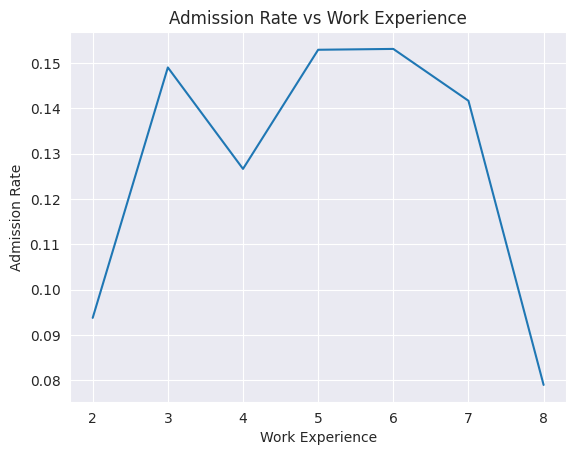

In [8]:
grp = df.groupby(['work_exp','admission']).count()['gender']
#df_aug = df
grp2 = df.groupby(['work_exp']).count()['gender']
print(grp2)
exp_ad_dict = dict()
#grp.index

for exp in df['work_exp'].unique():
  total_count = grp2[exp]
  if (exp,'Admit') not in grp.index:
    admit_count = 0
  else:
    admit_count = grp.loc[(exp,'Admit')]
  rate = admit_count/total_count
  exp_ad_dict[exp] = rate

exp_ad_dict = dict(sorted(exp_ad_dict.items(), key=lambda x: x[0]))
exp_ad_dict.pop(1.0)
exp_ad_dict.pop(9.0)

df_aug = pd.DataFrame.from_dict(exp_ad_dict,orient='index')
print(df_aug)
plt.figure()
sns.lineplot(data=df_aug,x=df_aug.index,y=df_aug[0])
plt.xlabel('Work Experience')
plt.ylabel('Admission Rate')
plt.title('Admission Rate vs Work Experience')